In [1]:
import sys
sys.path.insert(0,'C:\\code\\python_for_the_financial_economist\\')

"""
Magic commands
"""

%load_ext autoreload
%autoreload 2

"""
Load relevant packages
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

"""
Own packages
"""

from codelib.visualization.layout import DefaultStyle
DefaultStyle();

# Univariate statistics 

In this Jupyter notebook, we will look at univariate statistics. In particular, we will look at how we can use (primarily) the `scipy.stats` package (see docs [here](https://docs.scipy.org/doc/scipy/reference/stats.html)) to work with random variables, distributions, moments, etc. 

Generally, we will look at continuous random variables, but replacing the integrals with sums will give the corresponding formulas for discrete random variables. 

A tutorial can be found [here](https://docs.scipy.org/doc/scipy/tutorial/stats.html). 


## Random variables

Working with random variables is key when dealing with uncertain events, e.g. the future development of an equity portfolio.  

A [random variable](https://en.wikipedia.org/wiki/Random_variable) $X(\omega)$ is a function of the outcome, $\omega$, in the sample space, $\Omega$, i.e $\omega \in \Omega$, to a measurable set $E$ (typically the real numbes $\mathbb{R}$) such that each possible value $x$ of the random variable defines an event in $\Omega$. 

The probability that $X$ takes on a value in a measurable set $S \subseteq E$ is 

$$
\text{P} (X\in S)= \text{P} (\{\omega \in \Omega \mid X(\omega )\in S\}) 
$$


We will typically describe a random variable in terms of its distribution which can be represented in different ways: 

* Probability function (discrete random variable) or probability density function (continuous random variable) 
* Cummulative distribution function 
* Characteristic function
* Quantile function


### Probability density function 

If $X: \Omega \to \mathbb{R}$ is a continuous random variable, then $f_X$ is a [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) if 

$$
f_X(x) \geq 0
$$

and 

$$
\intop_{- \infty}^\infty f_X(x) dx = 1
$$

We will be able to calculate probabilites using the integral 

$$
\text{P}(X \in [a, b]) = \intop_{a}^b f_X(x)dx
$$

__Example: Normal distribution__

The density of a normal distribution is given by 

$$
f_X\left(x; \mu, \sigma^2 \right) = \frac{1}{\sigma \sqrt{ 2 \pi}} e^{-\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^2}
$$

We can use the `norm` class in `scipy.stats` to work with the normal distribution (note that `scipy.stats` is imported as `stats`). See documentation [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html#scipy.stats.norm).  `norm` contains the method `pdf(x, loc=0, scale=1)`. The location parameter `loc` corresponds to $\mu$ and the scale parameter `scale` corresponds to $\sigma$. 

We can therefore easily plot the pdf of a normal distribution 

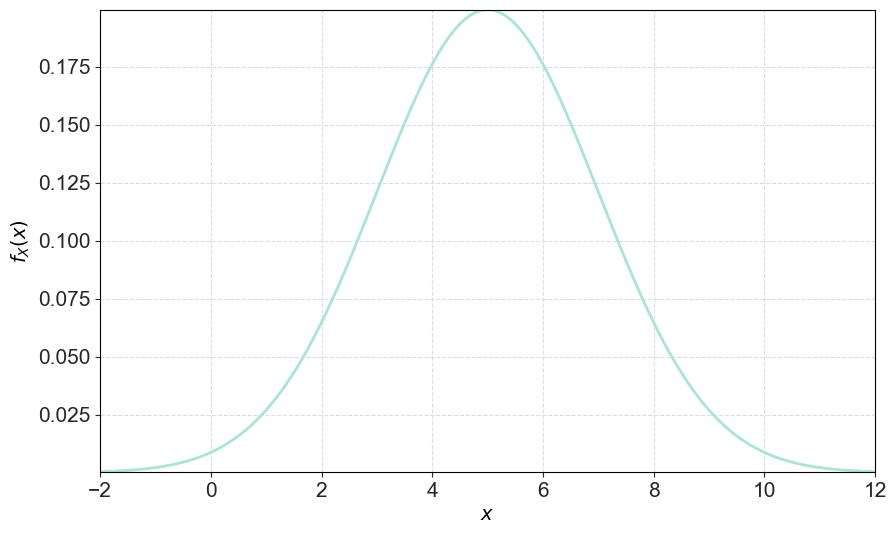

In [2]:
mu = 5.0
sigma = 2.0

x_values = np.linspace(-2.0, 12.0, 1000)
pdf_values = stats.norm.pdf(x_values, loc=mu, scale=sigma)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_values, pdf_values);
ax.set_xlabel('$x$', size=14)
ax.set_ylabel('$f_X(x)$', size=14);

### Cumulative distribution function 

The [cummulative distribution function](https://en.wikipedia.org/wiki/Cumulative_distribution_function) $F_X$ is defined by the probability that the random variables takes a values less than $x$

$$
F_X(x) = \intop_{-\infty}^x f_x(u)du = \text{P} (\{\omega \in \Omega \mid X(\omega ) \leq x \}) = P(X \leq x) 
$$

This also implies that 

$$
\frac{d}{dx} F_X(x) = f_X(x)
$$

It should be notet that 

$$
\begin{align}
\underset{x \to \infty}{\lim} F_X(x) &= 1\\
\underset{x \to -\infty}{\lim } F_X(x) &= 0
\end{align}
$$

From simple integration rules, it is clear that we will be able to calculate probabilites using

$$
\text{P}(X \in [a, b]) = \intop_{a}^b f_X(x)dx = \intop_{-\infty}^b f_X(x)dx - \intop_{-\infty}^a f_X(x)dx = F_X(b) - F_X(a)
$$


__Example: Normal distribution__

The cdf of a normal distribution is given by 

$$
F_X(x; \mu, \sigma^2) = \frac {1}{2}\left[1+\text {erf} \left({\frac {x-\mu }{\sigma {\sqrt {2}}}}\right)\right]
$$

where $\text{erf}$ is the [error function](https://en.wikipedia.org/wiki/Error_function). 

Again, we can use the `norm` class in `scipy.stats`. The class `norm` contains the method `cdf(x, loc=0, scale=1)`. We can therefore easily plot the cdf of a normal distribution.

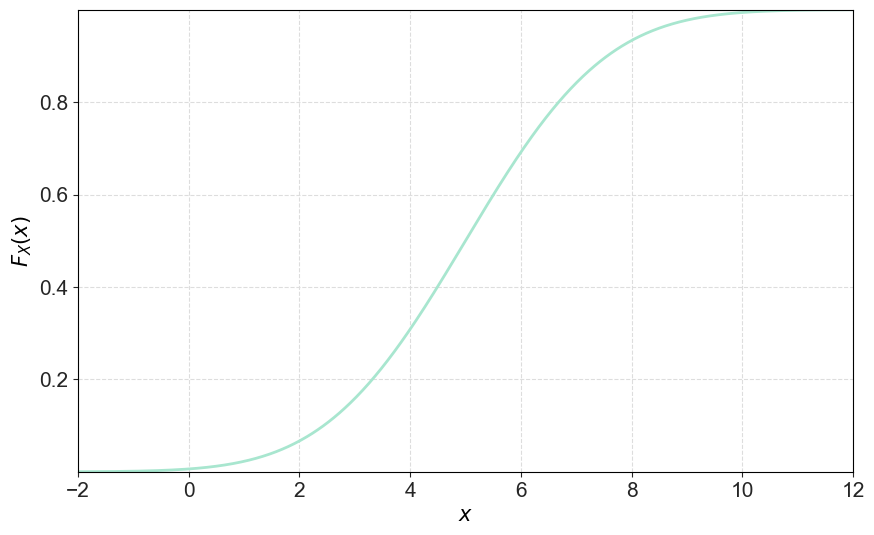

In [3]:
mu = 5.0
sigma = 2.0

x_values = np.linspace(-2.0, 12.0, 1000)
cdf_values = stats.norm.cdf(x_values, loc=mu, scale=sigma)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_values, cdf_values);
ax.set_xlabel('$x$')
ax.set_ylabel('$F_X(x)$');

We can also easily calculate the probability that the normal random variable is between $a$ and $b$

In [4]:
a = 3.0
b = 7.0
mu = 5.0
sigma = 2.0

prob = stats.norm.cdf(b, loc=mu, scale=sigma) - stats.norm.cdf(a, loc=mu, scale=sigma) 
prob

0.6826894921370859

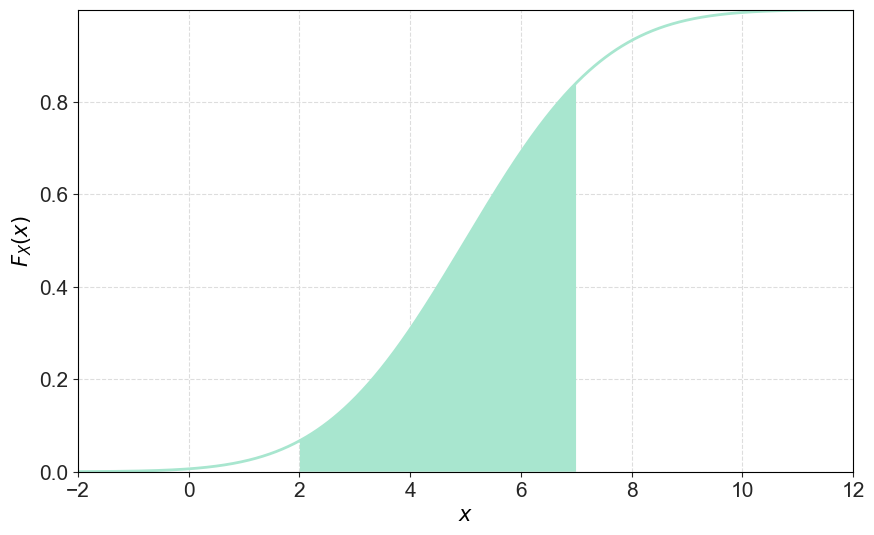

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_values, cdf_values);
ax.fill_between(x_values, cdf_values, where=np.logical_and(x_values>2.0,x_values<b))
ax.set_xlabel('$x$')
ax.set_ylabel('$F_X(x)$');

### Characteristic function 

The [characteristic function](https://en.wikipedia.org/wiki/Characteristic_function_(probability_theory)) is defined by the expectation 

$$
\varphi_X(t) \equiv \text{E}\left[ e^{i t X} \right]
$$

where $i = \sqrt{-1}$ is the [imaginary unit](https://en.wikipedia.org/wiki/Imaginary_unit). It can takes complex values such that $\varphi_X: \mathbb{R} \to \mathbb{C}$. 

The definition implies that 

$$
\varphi_X(t) = \text{E}\left[ e^{i t X} \right] = \intop_{-\infty}^\infty e^{i t x} f_X(x)dx
$$

### Quantile function 

The quantile function of a random variable, $Q_X$, is the inverse of the cummulative distribution function 

$$
Q_X(p) = F_X^{-1}(p)
$$

such that 

$$
P(X \leq Q_X(p)) = p
$$

We illustrate the percentiles for a standard normal random variable below. 

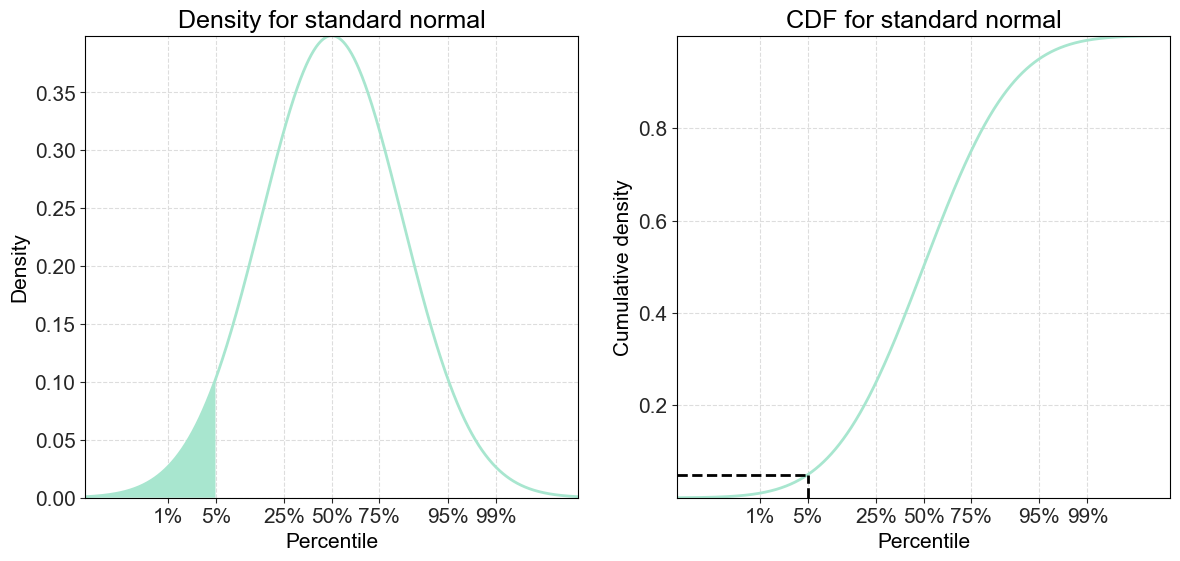

In [6]:
x_values = np.linspace(-3.5, 3.5, 1000)

ticks = [0.01, 0.05,  0.25,  0.5, 0.75, 0.95, 0.99]
tick_labels = ['1%', '5%', '25%', '50%', '75%', '95%', '99%']

pdf_values = stats.norm.pdf(x_values, loc=0, scale=1)

perc_values = stats.norm.ppf(ticks, loc=0, scale=1)

cdf_values = stats.norm.cdf(x_values, loc=0, scale=1)

percentile_to_plot = perc_values[1]
cdf_val_to_plot = stats.norm.cdf(percentile_to_plot, loc=0, scale=1)

"""
Plotting
"""

fig, ax = plt.subplots(1,2, figsize=(14,6))

"""
Pdf
"""

ax1 = ax[0]

ax1.plot(x_values, pdf_values)
ax1.fill_between(x_values, pdf_values,
                 where=np.logical_and(x_values>-3.5, x_values<percentile_to_plot))

ax1.set_xticks(perc_values)
ax1.set_xticklabels(tick_labels)


ax1.set_title('Density for standard normal')
ax1.set_ylabel('Density')
ax1.set_xlabel('Percentile');


"""
cdf
"""

ax2 = ax[1]

ax2.plot(x_values, cdf_values)

ax2.set_xticks(perc_values)
ax2.set_xticklabels(tick_labels)
ax2.axvline(x=percentile_to_plot, ymin=0, ymax=cdf_val_to_plot, color="black", linestyle="--")
ax2.plot([-3.5, percentile_to_plot],[cdf_val_to_plot]*2, color="black", linestyle="--")

ax2.set_title('CDF for standard normal')
ax2.set_ylabel('Cumulative density');
ax2.set_xlabel('Percentile');

__Example: Normal distribution__

Again, we can use the `norm` class in `scipy.stats`. The class `norm` contains the method `ppf(q, loc=0, scale=1)`. We can therefore easily calculate quantiles of a normal distribution 

In [7]:
"""
Calculate the 5th and 95th quantile
"""

mu = 5.0
sigma = 2.0

quantiles = stats.norm.ppf([0.05, 0.95], loc=mu, scale=sigma)
quantiles

array([1.71029275, 8.28970725])

## Moments

Moments such as the mean and variance are relevant summary statistics to describe the properties of different distributions. 

### Expected value 

The first moment of the probability distribution of a random variable $X$ is the expected value of $X$ which we will denote by $\text{E}[X]=\mu=\mu_X$. It is defined as 

$$
\begin{equation*}
\text{E}[X] = \int_{-\infty}^\infty x f_X(x) dx
\end{equation*}
$$

If $g(X)$ is a function of $X$ (and $\int_{-\infty}^\infty \vert g(x) \vert f_X(x) dx < \infty$) then 

$$
\begin{equation*}
\text{E}[g(X)] = \int_{-\infty}^\infty g(x) f_X(x) dx
\end{equation*}
$$

implying the well-known rule

$$
\text{E}[aX + b] = a \text{E}[X] + b
$$

Please note that generally, 

$$
g(\text{E}[X]) \neq \text{E}[g(X)]
$$

__Example: Normal distribution__

The expected value of a normal random variable is given by the location parameter $\mu$. 

Again, we can use the `norm` class in `scipy.stats`. The class `norm` contains the methods `mean(loc=0, scale=1)`, `moment(n, loc=0, scale=1)`, `stats(loc=0, scale=1, moments=’mv’)` and `expect(func, args=(), loc=0, scale=1, lb=None, ub=None, conditional=False, **kwds)` that are relevant for calculating moments. 

Let us try to calculate mean of a normal distribution

In [8]:
mu = 5.0
sigma = 2.0

stats.norm.mean(loc=mu, scale=sigma)

5.0

In [9]:
# the expected value is the first moment
stats.norm.moment(1, loc=mu, scale=sigma)

5.0

In [10]:
# An alternative method
stats.norm.stats(loc=mu, scale=sigma, moments='m')

5.0

Consider 

$$
g(X) = X^2
$$

We would like to compare $\text{E}[g(X)]$ and $g(\text{E}[X])$ to show that they are generally not the same!

In [11]:
 """
 Calculate E(g(X))
 """
# define a lambda function returning x^2
g = lambda x: x**2
    
stats.norm.expect(g, args=(), loc=mu, scale=sigma)

29.0

In [12]:
 """
 Calculate g(E(X))
 """

g(stats.norm.mean(loc=mu, scale=sigma))

25.0

### Variance 

The variance of a random variable is the expected value of its squared deviation from its mean $\mu$ - the dispersion about the centre of the density. The variance is defined by

$$
\begin{equation*}
\text{Var}[X] = \sigma^2 = \text{E}[(X-\mu)^2] = \intop_{-\infty}^\infty (x-\mu)^2 f_X(x) dx
\end{equation*}
$$

We assume that $\text{E}[X^2]$ is finite, but this may not always be the case.

We can for a random variable $X$ also write

$$
\begin{equation*}
\text{Var}[X] = \text{E}[X^2] - \mu^2
\end{equation*}
$$

The following rule is often used. Let $X$ be any random variable having mean $\mu$ and where $\text{E}[X^2]$ is finite. Then, 

$$
\begin{equation*}
\text{Var}[b + aX] = a^2\text{Var}[X]
\end{equation*}
$$

We define the standard deviation as the square root of the variance

$$
\text{Sd}[X] = \sqrt{\text{Var}[X]}
$$

__Example: Normal distribution__

The variance of a normal random variable is given by the squared scale parameter $\sigma^2$. 

Again, we can use the `norm` class in `scipy.stats`. The class `norm` contains the methods `var(loc=0, scale=1)`, `std(loc=0, scale=1)`, and `stats(loc=0, scale=1, moments=’mv’)` for calculating the variance. 

In [13]:
mu = 5.0
sigma = 2.0

stats.norm.var(loc=mu, scale=sigma)

4.0

In [14]:
stats.norm.stats(loc=mu, scale=sigma, moments='v')

4.0

### Higher order moments

Let $X$ be any random variable with $f_X(x)$ and $k$ be any positive integer. The $k$'th moment of $X$ about the origin (raw moment) is given by 

$$
\text{RM}^k [X] = \text{E}[X^k]
$$

and the $k$'th moment of $X$ about the mean (central moment) is given by 

$$
\text{CM}^k [X] = \text{E}[(X-\mu)^k]
$$

Again, we need the integrals for the expected values to be defined. Thus, $\int_{-\infty}^\infty \vert x \vert^k f_X(x) dx < \infty$. 

__Skewnewss and kurtosis__

The skewness coefficient

$$
\begin{equation*}
\text{Skew}[X] = \frac{\text{E}[(X-\mu)^3]}{\sigma^3}
\end{equation*}
$$
and the coefficient of (excess) kurtosis

$$
\begin{equation*}
 \text{Kurt}[X] = \frac{\text{E}[(X-\mu)^4]}{\sigma^4} - 3
\end{equation*}
$$

are very important in finance. Excess kurtosis refers to the fact that the kurtosis of a normal distribution is $3$. 


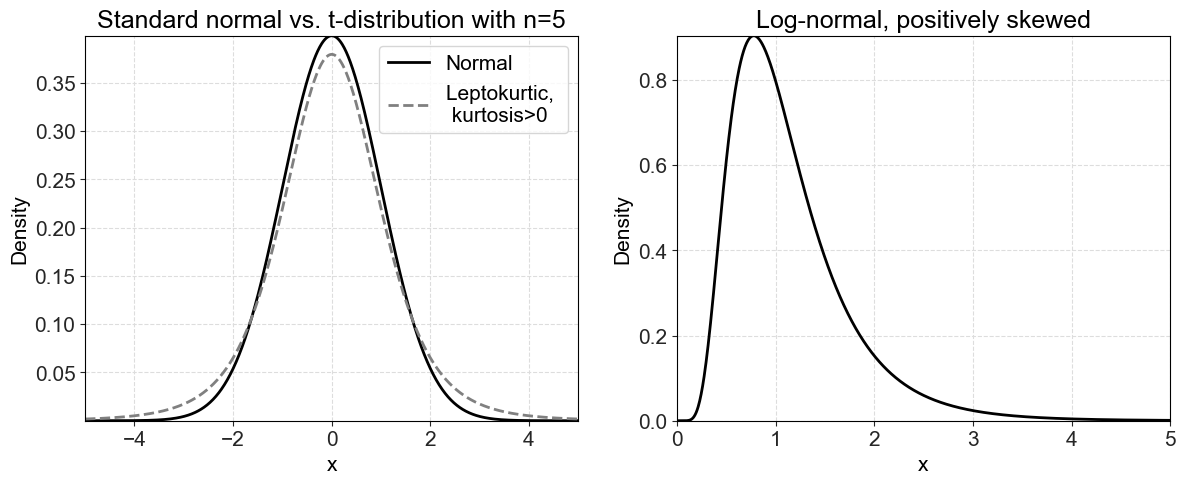

In [15]:
x = np.linspace(-5, 5, 1000)

n_dens = stats.norm.pdf(x, loc=0, scale=1)
t_dens = stats.t.pdf(x, df=5, loc=0, scale=1)

fig, ax = plt.subplots(1,2, figsize=(14,5))

"""
Norm vs. t-dist 
"""

ax1 = ax[0]

ax1.plot(x, n_dens, color="black", label='Normal')
ax1.plot(x, t_dens, color="gray", linestyle="--", label="Leptokurtic, \n kurtosis>0")
ax1.set_title("Standard normal vs. t-distribution with n=5")

ax1.legend(loc=1)
ax1.set_xlabel('x')
ax1.set_ylabel('Density')

"""
log-normal
"""
x = np.linspace(0, 5, 1000)

logn_dens = stats.lognorm.pdf(x, s=0.5, loc=0, scale=1)
ax2 = ax[1]

ax2.plot(x, logn_dens, color="black")
ax2.set_title("Log-normal, positively skewed")

ax2.set_xlabel('x')
ax2.set_ylabel('Density');

## Drawing from a distribution

We will often be interested in drawing random samples from a particular distribution, e.g. when examing the properties of estimators or when performing Monte Carlo simulations. 


__Example: Normal distribution__

Again, we can use the `norm` class in `scipy.stats`. The class `norm` contains the method `rvs(loc=0, scale=1, size=1)`. We can easily draw a random sample from a normal distribution!

In [16]:
mu = 5.0
sigma = 2.0
size = 1000 # drawing 1000 observations

random_sample = stats.norm.rvs(loc=mu, scale=sigma, size=size)

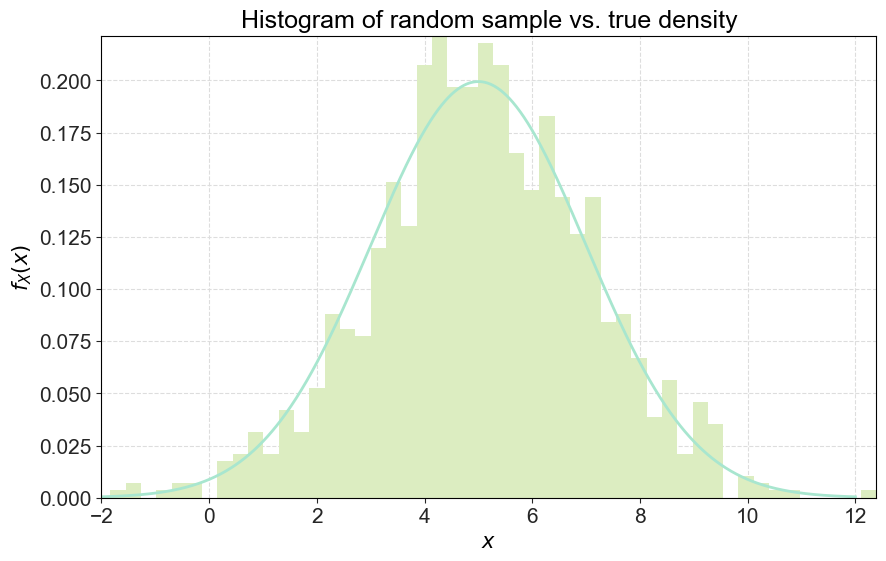

In [17]:
mu = 5.0
sigma = 2.0

x_values = np.linspace(-2.0, 12.0, 1000)
pdf_values = stats.norm.pdf(x_values, loc=mu, scale=sigma)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_values, pdf_values);
ax.hist(random_sample, bins=50, density=True)
ax.set_title("Histogram of random sample vs. true density")
ax.set_xlabel('$x$')
ax.set_ylabel('$f_X(x)$');

## The empirical distribution

An [empirical distribution function](https://en.wikipedia.org/wiki/Empirical_distribution_function) is the distribution function associated with the empirical measure of a sample. 

Let $X_1, ..., X_n$ be a sequence iid random variables with cdf $F_X(x)$, then the empirical distribution function is defined as 

$$
F_n(x) = \frac{1}{n}\sum_{i=1}^n I(X_i \leq x)
$$

where $I(X_i \leq x)$ is an indicator function taking the value 1 if $X_i \leq x$ and zero otherwise. Under regularity conditions, the empirical distribution function $F_n$ will converge to the true cdf when $n \to \infty$. 

We can calculate e.g. the mean and variance of the empirical distribution (integrals are replaced by sums since the empirical distribution is discrete)

$$
\text{E}_n [X] = \frac{1}{n}\sum_{i=1}^N x_i
$$

and

$$
\text{Var}_n [X] = \frac{1}{n}\sum_{i=1}^N (x_i - \text{E}_n[X])^2
$$

We will sometimes use the empirical distribution directly when we want to relate the past and the future. E.g. assuming that 

$$
\boldsymbol{X} \sim F_n(x)
$$

## Scenario probabilities

We will in this course consider assigning different probabilities to each scenario and not necessarily $1 / n$ as for the empirical distribution function above. We will assume that 

$$
\boldsymbol{X} \sim \{p_i, x_i \}_{i=1}^n
$$

where 

$$
\sum_{i=1}^n p_i = 1 \; \text{ and }\; \{p_i \geq 0 \}_{i=1}^n
$$

We can define the scenario distribution function 

$$
F_n(x) = \sum_{i=1}^n p_i I(X_i \leq x)
$$

We can use it to calculate moments, e.g. the mean

$$
\text{E}_n [X] = \sum_{i=1}^n p_i x_i
$$

__Example__

We may have the four scenarios 

\begin{equation}
\{p_j, x_j \}_{j=1}^4 = \{(0, 0.33), (0, 0.1), (1, 0.2), (1, 0.37)\}
\end{equation}

Probabilities sum to one and are all positive

$$
\sum_{i=1}^4 p_i = 0.33 + 0.1 + 0.2 + 0.37 = 1
$$

The expected value is given by 

$$
\sum_{i=1}^4 p_i x_i = 0.33 \cdot 0 + 0.1 \cdot 0 + 0.2 \cdot 1 + 0.37 \cdot 1 = 0.57
$$


## Summary

We have revisited basic properties of univariate distributions and how to use `scipy.stats` to calculate densities, moments, etc. for the normal distribution. 

`scipy.stats` has implemented numerous distributions that can be used in a similar fashion (see [here](https://docs.scipy.org/doc/scipy/reference/stats.html) for a list) 

We note that all the distributions has the method `rvs` that makes it possible to generate random draws from this particular distribution. 